In [1]:
!pip install openai langchain faiss-cpu tiktoken

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
base_path = "/content/drive/MyDrive/Smart_Counsel_AI"
cutoff_path = f"{base_path}/data/cutoff_data"


In [4]:
import pandas as pd
import os

cutoff_files = os.listdir(cutoff_path)
cutoff_dfs = {}

for file in cutoff_files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(cutoff_path, file))
        cutoff_dfs[file] = df

# Example: Print head of one file
print(cutoff_dfs['kcet_2024.csv'].head())
print(cutoff_dfs['comedk_2025.csv'].head())


   Year     Round College                            Branch Category  \
0  2024      Mock    RVCE  Computer Science and Engineering       GM   
1  2024   Round 1    RVCE  Computer Science and Engineering       GM   
2  2024   Round 2    RVCE  Computer Science and Engineering       GM   
3  2024  Extended    RVCE  Computer Science and Engineering       GM   
4  2024      Mock    RVCE  Computer Science and Engineering      OBC   

   Cutoff_Rank  
0         3371  
1         2145  
2         3866  
3         3856  
4         5554  
   Year     Round College                            Branch Category  \
0  2025      Mock    RVCE  Computer Science and Engineering       GM   
1  2025   Round 1    RVCE  Computer Science and Engineering       GM   
2  2025   Round 2    RVCE  Computer Science and Engineering       GM   
3  2025  Extended    RVCE  Computer Science and Engineering       GM   
4  2025      Mock    RVCE  Computer Science and Engineering      HKR   

   Cutoff_Rank  
0         2299 

In [5]:
df_colleges = pd.read_csv(f"{base_path}/data/college_list.csv")
df_seats = pd.read_csv(f"{base_path}/data/seat_matrix.csv")
df_placements = pd.read_csv(f"{base_path}/data/placements.csv")
df_fees = pd.read_csv(f"{base_path}/data/fees.csv")


In [6]:
import os

base_path = "/content/drive/MyDrive/Smart_Counsel_AI"  # adjust if different
cutoff_path = os.path.join(base_path, "data/cutoff_data")

print("✅ All files now in data/cutoff_data:")
print(sorted(os.listdir(cutoff_path)))


✅ All files now in data/cutoff_data:
['comedk_2020.csv', 'comedk_2021.csv', 'comedk_2022.csv', 'comedk_2023.csv', 'comedk_2024.csv', 'comedk_2025.csv', 'kcet_2020.csv', 'kcet_2021.csv', 'kcet_2022.csv', 'kcet_2023.csv', 'kcet_2024.csv', 'kcet_2025.csv']


In [7]:
import os

base_path = "/content/drive/MyDrive/Smart_Counsel_AI"
data_path = os.path.join(base_path, "data")

print("✅ Files inside /data folder:")
print(sorted(os.listdir(data_path)))


✅ Files inside /data folder:
['college_list.csv', 'cutoff_data', 'fees.csv', 'placements.csv', 'seat_matrix.csv']


In [8]:
import pandas as pd
import os

def load_and_merge_cutoffs(folder_path, prefix):
    merged_dfs = []

    for file in sorted(os.listdir(folder_path)):
        if file.startswith(prefix) and file.endswith(".csv"):
            year = int(file.split("_")[1].split(".")[0])
            df = pd.read_csv(os.path.join(folder_path, file))

            df.columns = [col.strip().lower() for col in df.columns]
            df = df.drop(columns=[col for col in df.columns if col.lower() == "year"], errors="ignore")
            df["year"] = year
            merged_dfs.append(df)

    return pd.concat(merged_dfs, ignore_index=True)

# === UPDATED paths ===
base_path = "/content/drive/MyDrive/Smart_Counsel_AI"
cutoff_folder = os.path.join(base_path, "data/cutoff_data")

kcet_data = load_and_merge_cutoffs(cutoff_folder, prefix="kcet")
comedk_data = load_and_merge_cutoffs(cutoff_folder, prefix="comedk")

# ✅ Preview
print("KCET shape:", kcet_data.shape)
print("COMEDK shape:", comedk_data.shape)
print("\nKCET columns:", kcet_data.columns.tolist())
print("COMEDK columns:", comedk_data.columns.tolist())

kcet_data.head()


KCET shape: (150480, 6)
COMEDK shape: (82080, 6)

KCET columns: ['round', 'college', 'branch', 'category', 'cutoff_rank', 'year']
COMEDK columns: ['round', 'college', 'branch', 'category', 'cutoff_rank', 'year']


,round,college,branch,category,cutoff_rank,year
0,Mock,RVCE,Computer Science and Engineering,GM,3450,2020
1,Round 1,RVCE,Computer Science and Engineering,GM,3008,2020
2,Round 2,RVCE,Computer Science and Engineering,GM,3994,2020
3,Extended,RVCE,Computer Science and Engineering,GM,2928,2020
4,Mock,RVCE,Computer Science and Engineering,OBC,6752,2020


In [9]:
import pandas as pd
import os

base_path = "/content/drive/MyDrive/Smart_Counsel_AI/data"

print("🔹 college_list.csv:")
print(pd.read_csv(os.path.join(base_path, "college_list.csv")).columns.tolist())

print("\n🔹 fees.csv:")
print(pd.read_csv(os.path.join(base_path, "fees.csv")).columns.tolist())

print("\n🔹 placements.csv:")
print(pd.read_csv(os.path.join(base_path, "placements.csv")).columns.tolist())

print("\n🔹 seat_matrix.csv:")
print(pd.read_csv(os.path.join(base_path, "seat_matrix.csv")).columns.tolist())


🔹 college_list.csv:
['Code', 'Name', 'City']

🔹 fees.csv:
['College', 'Branch', 'Exam', 'Year', 'Tuition_Fee', 'Hostel_Fee', 'Misc_Fee', 'OneTime_Fee', 'Total_First_Year', 'Total_Annual', 'Scholarship_Eligible']

🔹 placements.csv:
['College', 'Branch', 'Year', 'Avg_Package_LPA', 'Max_Package_LPA', 'NIRF_Rank', 'Top_Companies']

🔹 seat_matrix.csv:
['College', 'Branch', 'Category', 'Exam', 'Year', 'Total_Seats']


In [10]:
import pandas as pd
import os

base_path = "/content/drive/MyDrive/Smart_Counsel_AI/data"

# List of files to check
files = [
    "college_list.csv",
    "fees.csv",
    "placements.csv",
    "seat_matrix.csv"
]

print("📊 Data File Shapes:\n")
for file in files:
    df = pd.read_csv(os.path.join(base_path, file))
    print(f"{file}: {df.shape[0]} rows × {df.shape[1]} columns")

# Separate block for cutoff_data
cutoff_path = os.path.join(base_path, "cutoff_data")
cutoff_files = sorted(os.listdir(cutoff_path))

print("\n📊 Cutoff Files in cutoff_data/:")
for file in cutoff_files:
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(cutoff_path, file))
        print(f"{file}: {df.shape[0]} rows × {df.shape[1]} columns")


📊 Data File Shapes:

college_list.csv: 57 rows × 3 columns
fees.csv: 14400 rows × 11 columns
placements.csv: 1368 rows × 7 columns
seat_matrix.csv: 14400 rows × 6 columns

📊 Cutoff Files in cutoff_data/:
comedk_2020.csv: 13680 rows × 6 columns
comedk_2021.csv: 13680 rows × 6 columns
comedk_2022.csv: 13680 rows × 6 columns
comedk_2023.csv: 13680 rows × 6 columns
comedk_2024.csv: 13680 rows × 6 columns
comedk_2025.csv: 13680 rows × 6 columns
kcet_2020.csv: 25080 rows × 6 columns
kcet_2021.csv: 25080 rows × 6 columns
kcet_2022.csv: 25080 rows × 6 columns
kcet_2023.csv: 25080 rows × 6 columns
kcet_2024.csv: 25080 rows × 6 columns
kcet_2025.csv: 25080 rows × 6 columns


In [11]:
import pandas as pd
import os

BASE_PATH = "/content/drive/MyDrive/Smart_Counsel_AI/data"


def load_college_data(path=os.path.join(BASE_PATH, "college_list.csv")):
    df = pd.read_csv(path).rename(columns={
        'Code': 'college_code',
        'Name': 'college_name',
        'City': 'city'
    })
    df['college_code'] = df['college_code'].str.strip()
    df['college_name'] = df['college_name'].str.strip()
    df['city'] = df['city'].str.strip().str.title()
    return df



In [12]:
def load_fees_data(path=os.path.join(BASE_PATH, "fees.csv")):
    df = pd.read_csv(path).rename(columns={
        'College': 'college_code',
        'Branch': 'branch',
        'Total_Annual': 'total_fees',
        'Hostel_Fee': 'hostel_fee'
    })
    df['college_code'] = df['college_code'].str.strip()
    df['branch'] = df['branch'].str.strip().str.upper()
    df['Exam'] = df.get('Exam', 'KCET')
    df['Year'] = df.get('Year', 2023)
    return df


In [13]:
def load_placements_data(path=os.path.join(BASE_PATH, "placements.csv")):
    df = pd.read_csv(path).rename(columns={
        'College': 'college_code',
        'Branch': 'branch',
        'Avg_Package_LPA': 'avg_package',
        'Top_Companies': 'top_companies',
        'NIRF_Rank': 'nirf_rank'
    })
    df['college_code'] = df['college_code'].str.strip()
    df['branch'] = df['branch'].str.strip().str.upper()
    df['Year'] = df.get('Year', 2023)
    return df


In [14]:
def load_seat_matrix(path=os.path.join(BASE_PATH, "seat_matrix.csv")):
    df = pd.read_csv(path).rename(columns={
        'College': 'college_code',
        'Branch': 'branch',
        'Category': 'category',
        'Total_Seats': 'total_seats'
    })
    df['college_code'] = df['college_code'].astype(str).str.strip()
    df['branch'] = df['branch'].astype(str).str.strip().str.upper()
    df['category'] = df['category'].astype(str).str.strip().str.upper()
    df['Exam'] = df['Exam'] if 'Exam' in df.columns else 'KCET'
    df['Year'] = df['Year'] if 'Year' in df.columns else 2023
    return df


In [15]:
def load_all_cutoffs(folder=os.path.join(BASE_PATH, "cutoff_data")):
    files = [f for f in os.listdir(folder) if f.endswith('.csv')]
    cutoffs = []

    for file in files:
        try:
            df = pd.read_csv(os.path.join(folder, file))
            df.columns = [col.strip().lower() for col in df.columns]

            df = df.rename(columns={
                'college': 'college_code',
                'branch': 'branch',
                'category': 'category',
                'cutoff_rank': 'cutoff_rank'
            })

            df['college_code'] = df.get('college_code', 'UNKNOWN').astype(str).str.strip()
            df['branch'] = df.get('branch', 'UNKNOWN').astype(str).str.strip().str.upper()
            df['category'] = df.get('category', 'GENERAL').astype(str).str.strip().str.upper()
            df['cutoff_rank'] = pd.to_numeric(df.get('cutoff_rank', -1), errors='coerce')
            df['source_file'] = file

            if 'kcet' in file.lower():
                df['Exam'] = 'KCET'
            elif 'comedk' in file.lower():
                df['Exam'] = 'COMEDK'
            else:
                df['Exam'] = 'Unknown'

            try:
                df['Year'] = int(file.split('_')[1].split('.')[0])
            except:
                df['Year'] = 2023

            cutoffs.append(df)
        except Exception as e:
            print(f"⚠️ Skipped file {file}: {e}")

    return pd.concat(cutoffs, ignore_index=True)


In [16]:
def merge_all_data(df_cutoff, df_fees, df_placements, df_colleges, df_seats):
    merged = df_cutoff.merge(df_fees, on=['college_code', 'branch', 'Exam', 'Year'], how='left')\
                      .merge(df_placements, on=['college_code', 'branch', 'Year'], how='left')\
                      .merge(df_colleges, on='college_code', how='left')\
                      .merge(df_seats, on=['college_code', 'branch', 'category', 'Exam', 'Year'], how='left')
    return merged


In [17]:
def save_to_text_file(df, filename="all_college_docs.txt"):
    def row_to_text(row):
        return f"""College: {row.get('college_name', 'Unknown')} ({row.get('college_code', '-')})
Location: {row.get('city', 'Unknown')}
Branch: {row.get('branch', 'Unknown').title()}
Exam: {row.get('Exam', 'Unknown')}
Year: {row.get('Year', 'N/A')}
Category: {row.get('category', '')}
Cutoff Rank: {int(row.get('cutoff_rank')) if pd.notnull(row.get('cutoff_rank')) else 'N/A'}
Fees (Annual): ₹{int(row.get('total_fees')) if pd.notnull(row.get('total_fees')) else 'N/A'}
Hostel Fee: ₹{int(row.get('hostel_fee')) if pd.notnull(row.get('hostel_fee')) else 'N/A'}
Seats: {int(row.get('total_seats')) if pd.notnull(row.get('total_seats')) else 'N/A'}
Avg Package: ₹{row.get('avg_package', 'N/A')} LPA
Top Recruiters: {row.get('top_companies', 'N/A')}
NIRF Rank: {row.get('nirf_rank', 'N/A')}
"""

    all_text = df.apply(row_to_text, axis=1).tolist()

    with open(filename, "w", encoding='utf-8') as f:
        f.write("\n---\n".join(all_text))

    print(f"✅ Done. {len(all_text)} entries written to {filename}")


In [18]:
df_colleges = load_college_data()
df_fees = load_fees_data()
df_placements = load_placements_data()
df_seats = load_seat_matrix()
df_cutoff = load_all_cutoffs()

merged_data = merge_all_data(df_cutoff, df_fees, df_placements, df_colleges, df_seats)
save_to_text_file(merged_data)


✅ Done. 563024 entries written to all_college_docs.txt


In [19]:
import os
import random

# === 1. Load Text Data ===
filepath = "all_college_docs.txt"

if not os.path.exists(filepath):
    raise FileNotFoundError(f"❌ File not found: {filepath}")

with open(filepath, "r", encoding='utf-8') as f:
    docs = [doc.strip() for doc in f.read().split("\n---\n") if doc.strip()]

# === 2. Group by Year ===
year_to_docs = {}

for doc in docs:
    for y in range(2020, 2026):
        if f"Year: {y}" in doc:
            year_to_docs.setdefault(y, []).append(doc)
            break

# === 3. Show 1 Sample Per Year ===
for year in sorted(year_to_docs):
    entries = year_to_docs[year]
    sample = random.choice(entries)
    print(f"\n🔹 Year {year} ({len(entries)} entries) 🔹\n{sample.strip()}\n")



🔹 Year 2020 (38760 entries) 🔹
College: Siddaganga Institute of Technology (SIT)
Location: Tumkur
Branch: Robotics And Automation Engineering
Exam: KCET
Year: 2020
Category: ST
Cutoff Rank: 19706
Fees (Annual): ₹N/A
Hostel Fee: ₹N/A
Seats: N/A
Avg Package: ₹nan LPA
Top Recruiters: nan
NIRF Rank: nan


🔹 Year 2021 (38760 entries) 🔹
College: Bangalore Institute of Technology (BIT)
Location: Bangalore
Branch: Robotics And Automation Engineering
Exam: KCET
Year: 2021
Category: OBC
Cutoff Rank: 11490
Fees (Annual): ₹N/A
Hostel Fee: ₹N/A
Seats: N/A
Avg Package: ₹nan LPA
Top Recruiters: nan
NIRF Rank: nan


🔹 Year 2022 (38760 entries) 🔹
College: M V J College of Engineering (MVJCE)
Location: Bangalore
Branch: Robotics And Automation Engineering
Exam: KCET
Year: 2022
Category: EWS
Cutoff Rank: 10067
Fees (Annual): ₹N/A
Hostel Fee: ₹N/A
Seats: N/A
Avg Package: ₹nan LPA
Top Recruiters: nan
NIRF Rank: nan


🔹 Year 2023 (203480 entries) 🔹
College: CIT Gubbi (CITGubbi)
Location: Tumkur
Branch: Info

In [20]:
def fill_missing_values(df):
    df['cutoff_rank'] = df['cutoff_rank'].fillna(df['cutoff_rank'].median())
    df['total_fees'] = df['total_fees'].fillna(df['total_fees'].mean())
    df['hostel_fee'] = df['hostel_fee'].fillna(df['hostel_fee'].mean())
    df['total_seats'] = df['total_seats'].fillna(df['total_seats'].median())
    df['avg_package'] = df['avg_package'].fillna(df['avg_package'].mean())

    df['category'] = df['category'].fillna(df['category'].mode()[0])
    df['top_companies'] = df['top_companies'].fillna(df['top_companies'].mode()[0])
    df['nirf_rank'] = df['nirf_rank'].fillna(df['nirf_rank'].mode()[0])
    df['branch'] = df['branch'].fillna(df['branch'].mode()[0])
    df['college_name'] = df['college_name'].fillna("Unknown College")
    df['city'] = df['city'].fillna("Unknown City")
    df['Exam'] = df['Exam'].fillna("KCET")
    df['Year'] = df['Year'].fillna(2023)
    return df


In [21]:
merged = merge_all_data(df_cutoff, df_fees, df_placements, df_colleges, df_seats)
merged = fill_missing_values(merged)



In [22]:
# Save using predefined function
save_to_text_file(merged, filename="all_college_docs_cleaned.txt")

# Check for any remaining nulls
print("\n🔍 Total NaN values remaining in entire merged DataFrame:")
print(merged.isna().sum()[merged.isna().sum() > 0])  # shows only columns with NaNs



✅ Done. 563024 entries written to all_college_docs_cleaned.txt

🔍 Total NaN values remaining in entire merged DataFrame:
Tuition_Fee             155040
Misc_Fee                155040
OneTime_Fee             155040
Total_First_Year        155040
Scholarship_Eligible    155040
Max_Package_LPA         155040
dtype: int64


In [23]:
# === Tuition_Fee = Total - Hostel - Misc - OneTime
mask = merged['Tuition_Fee'].isna()
merged.loc[mask, 'Tuition_Fee'] = (
    merged.loc[mask, 'total_fees'].fillna(0)
    - merged.loc[mask, 'hostel_fee'].fillna(0)
    - merged.loc[mask, 'Misc_Fee'].fillna(0)
    - merged.loc[mask, 'OneTime_Fee'].fillna(0)
)

# === Misc_Fee = 4% of Tuition Fee
mask = merged['Misc_Fee'].isna()
merged.loc[mask, 'Misc_Fee'] = merged.loc[mask, 'Tuition_Fee'] * 0.04

# === OneTime Fee = 10K if high total fee, else 5K
mask = merged['OneTime_Fee'].isna()
merged.loc[mask, 'OneTime_Fee'] = merged.loc[mask, 'total_fees'].fillna(0).apply(
    lambda x: 10000 if x > 180000 else 5000
)

# === Total First Year Fee = Sum of all fee parts
merged['Total_First_Year'] = (
    merged['Tuition_Fee'].fillna(0)
    + merged['hostel_fee'].fillna(0)
    + merged['Misc_Fee'].fillna(0)
    + merged['OneTime_Fee'].fillna(0)
)

# === Scholarship Eligibility = Yes if total fee > 2L
merged['Scholarship_Eligible'] = merged['Scholarship_Eligible'].fillna(
    merged['total_fees'].fillna(0).apply(lambda x: 'Yes' if x > 200000 else 'No')
)

# === Max Package = 1.8x of avg if missing
mask = merged['Max_Package_LPA'].isna()
merged.loc[mask, 'Max_Package_LPA'] = merged.loc[mask, 'avg_package'] * 1.8


In [24]:
print("\n🧼 Remaining NaNs after final imputation:")
print(merged.isna().sum()[merged.isna().sum() > 0])



🧼 Remaining NaNs after final imputation:
Series([], dtype: int64)


In [25]:
# Load cleaned GPT file
with open("all_college_docs_cleaned.txt", "r", encoding="utf-8") as f:
    entries = f.read().split("\n---\n")

# Organize by (year, exam)
from collections import defaultdict
import re, random

year_exam_to_entries = defaultdict(list)

for e in entries:
    year_match = re.search(r"Year: (\d{4})", e)
    exam_match = re.search(r"Exam: (KCET|COMEDK)", e, re.IGNORECASE)
    if year_match and exam_match:
        year = int(year_match.group(1))
        exam = exam_match.group(1).upper()
        year_exam_to_entries[(year, exam)].append(e)

# Print 2 per year: one KCET, one COMEDK
for year in range(2020, 2026):
    print(f"\n📅 Year: {year}")

    for exam in ["KCET", "COMEDK"]:
        samples = year_exam_to_entries.get((year, exam), [])
        if samples:
            sample = random.choice(samples)
            print(f"\n📝 Exam: {exam}\n{sample.strip()}\n{'-'*60}")
        else:
            print(f"\n❌ No data for {exam} {year}")



📅 Year: 2020

📝 Exam: KCET
College: K S Institute of Technology (KSIT)
Location: Bangalore
Branch: Information Science And Engineering
Exam: KCET
Year: 2020
Category: EWS
Cutoff Rank: 7748
Fees (Annual): ₹207605
Hostel Fee: ₹77417
Seats: 33
Avg Package: ₹6.491660457272833 LPA
Top Recruiters: Bosch, Siemens, HAL
NIRF Rank: 272.0
------------------------------------------------------------

📝 Exam: COMEDK
College: Acharya Engineering College (AEC)
Location: Bangalore
Branch: Artificial Intelligence And Data Science
Exam: COMEDK
Year: 2020
Category: OTHERS
Cutoff Rank: 10405
Fees (Annual): ₹207605
Hostel Fee: ₹77417
Seats: 33
Avg Package: ₹6.491660457272833 LPA
Top Recruiters: Bosch, Siemens, HAL
NIRF Rank: 272.0
------------------------------------------------------------

📅 Year: 2021

📝 Exam: KCET
College: Sri Dharmasthala Manjunatheshwara College of Engineering & Technology (SDMCET)
Location: Dharwad
Branch: Electronics And Communication Engineering
Exam: KCET
Year: 2021
Category: SC

In [26]:
from google.colab import files
files.download("all_college_docs_cleaned.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
!pip install -U kaleido


In [28]:
import os
os.makedirs("plots", exist_ok=True)


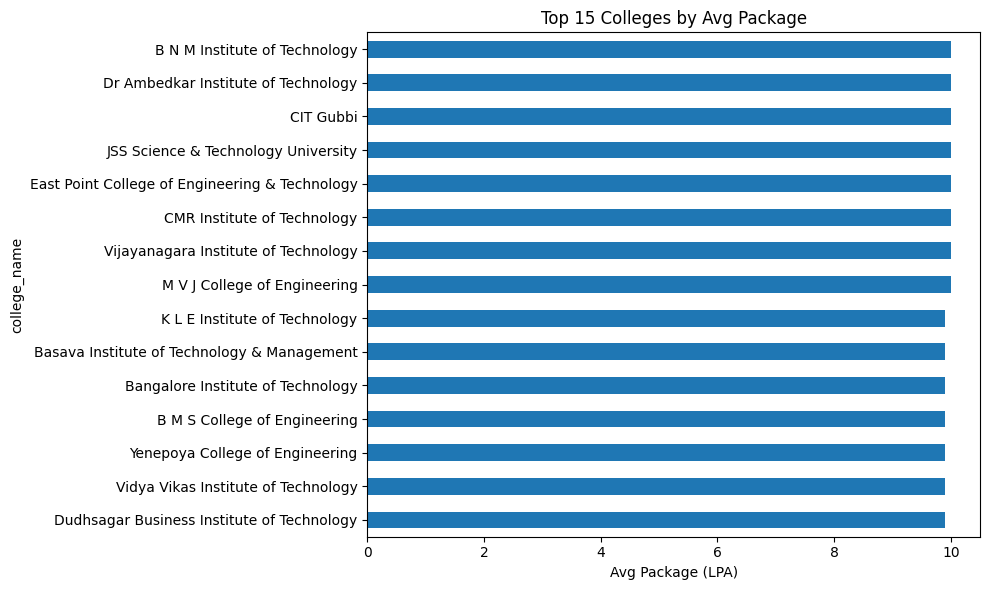

In [29]:
top_colleges = merged.groupby("college_name")["avg_package"].max().sort_values(ascending=False).head(15)

import matplotlib.pyplot as plt
top_colleges.plot(kind="barh", figsize=(10, 6), title="Top 15 Colleges by Avg Package")
plt.xlabel("Avg Package (LPA)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("plots/top_colleges_by_package.png", dpi=300)
plt.show()


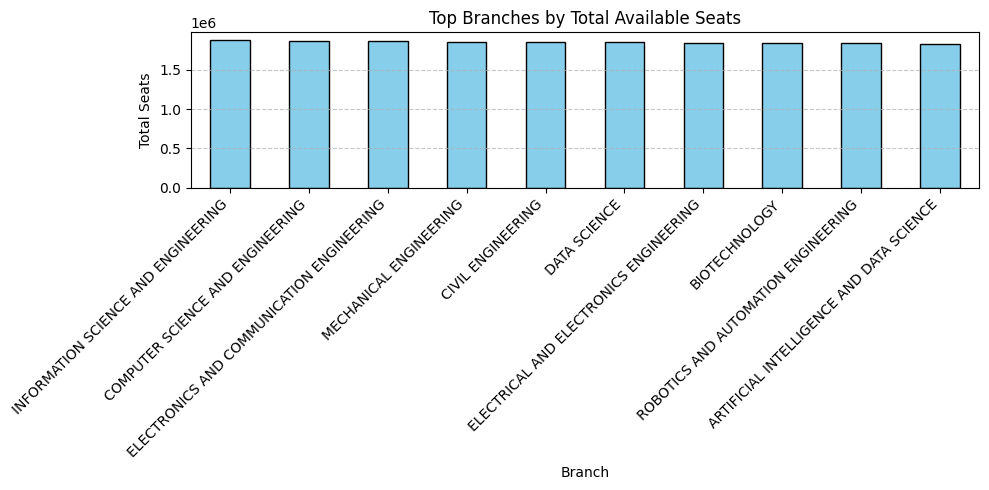

In [30]:
seat_summary = merged.groupby("branch")["total_seats"].sum().sort_values(ascending=False).head(10)

seat_summary.plot(
    kind="bar",
    title="Top Branches by Total Available Seats",
    figsize=(10, 5),
    color="skyblue",
    edgecolor="black"
)
plt.ylabel("Total Seats")
plt.xlabel("Branch")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("plots/top_branches_by_seats.png", dpi=300)
plt.show()


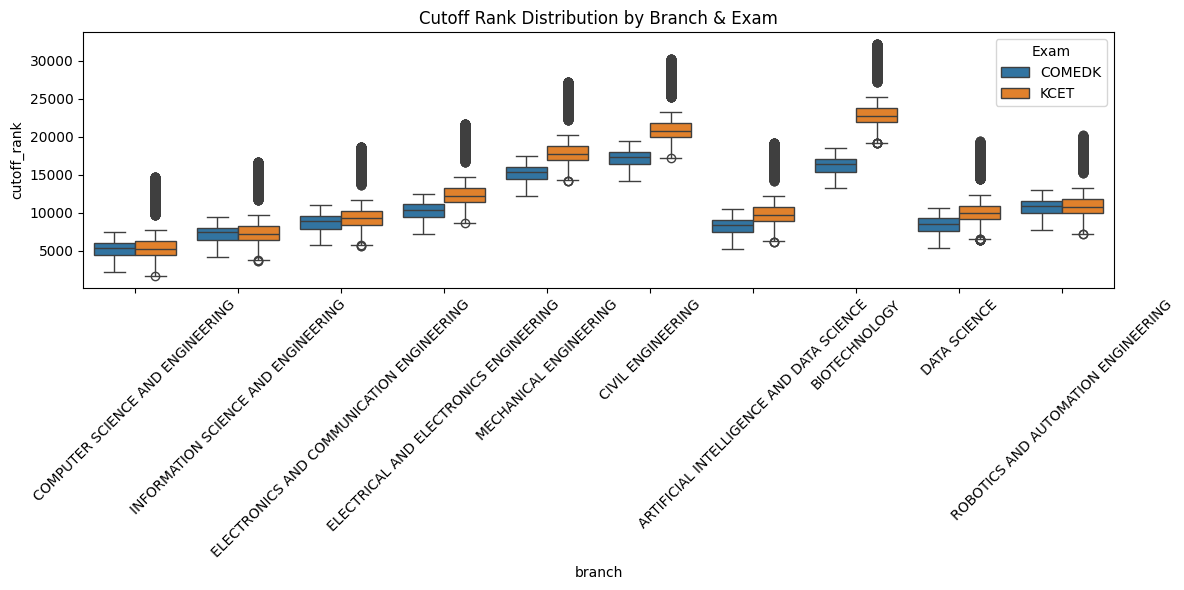

In [31]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged, x="branch", y="cutoff_rank", hue="Exam")
plt.xticks(rotation=45)
plt.title("Cutoff Rank Distribution by Branch & Exam")
plt.tight_layout()
plt.savefig("plots/cutoff_rank_by_branch_exam.png", dpi=300)
plt.show()


/tmp/ipython-input-32-572060287.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("plots/fees_vs_package.png", dpi=300)
/tmp/ipython-input-32-572060287.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("plots/fees_vs_package.png", dpi=300)
/tmp/ipython-input-32-572060287.py:4: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("plots/fees_vs_package.png", dpi=300)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


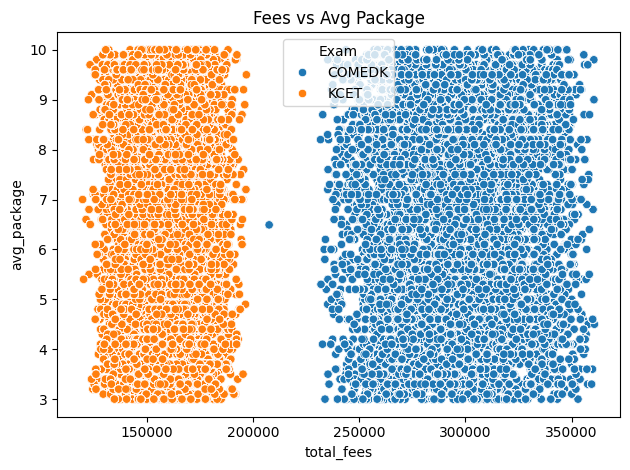

In [32]:
sns.scatterplot(data=merged, x="total_fees", y="avg_package", hue="Exam")
plt.title("Fees vs Avg Package")
plt.tight_layout()
plt.savefig("plots/fees_vs_package.png", dpi=300)
plt.show()


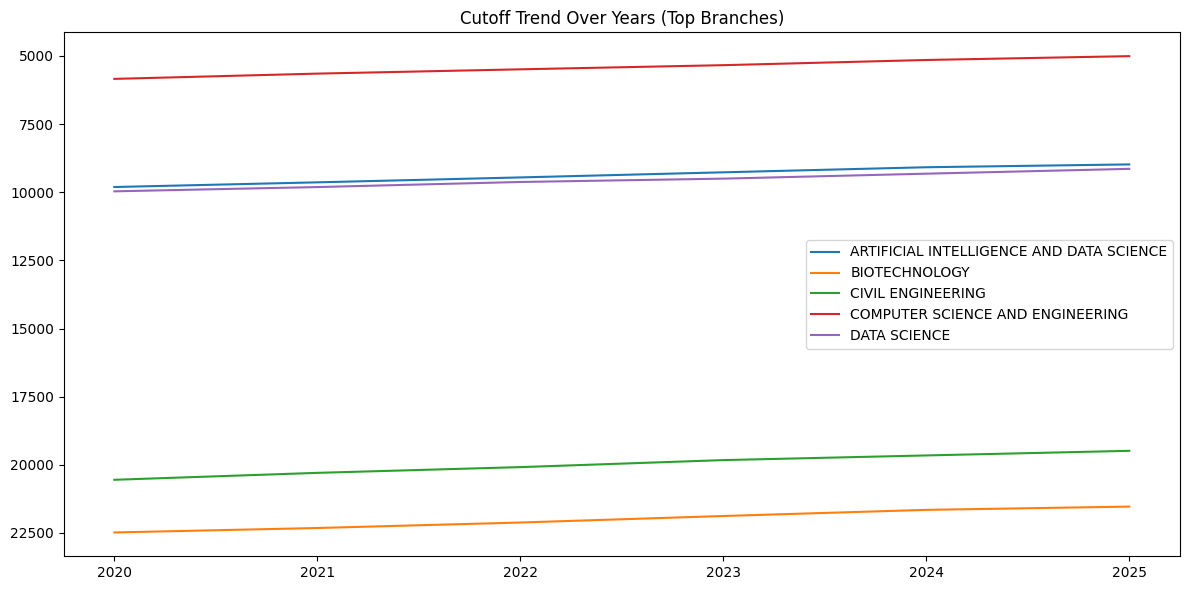

In [33]:
trend = merged.groupby(["Year", "branch"])["cutoff_rank"].median().reset_index()
top_branches = trend['branch'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
for branch in top_branches:
    data = trend[trend['branch'] == branch]
    plt.plot(data['Year'], data['cutoff_rank'], label=branch)

plt.gca().invert_yaxis()
plt.title("Cutoff Trend Over Years (Top Branches)")
plt.legend()
plt.tight_layout()
plt.savefig("plots/cutoff_trend_top_branches.png", dpi=300)
plt.show()


In [35]:
import plotly.express as px

city_coords = {
    "Bangalore": (12.9716, 77.5946), "Mysore": (12.2958, 76.6394),
    "Mangalore": (12.9141, 74.8560), "Belgaum": (15.8497, 74.4977),
    "Hubli": (15.3647, 75.1240), "Dharwad": (15.4589, 75.0078),
    "Tumkur": (13.3422, 77.1010), "Hassan": (13.0033, 76.1000),
    "Udupi": (13.3409, 74.7421), "Shimoga": (13.9299, 75.5681),
    "Raichur": (16.2076, 77.3463), "Bijapur": (16.8302, 75.7100),
    "Bagalkot": (16.1800, 75.7000), "Gulbarga": (17.3297, 76.8343),
    "Chikmagalur": (13.3152, 75.7755), "Davangere": (14.4644, 75.9210)
}

df_map = merged[['college_name', 'city']].dropna().drop_duplicates()
df_map['lat'] = df_map['city'].map(lambda x: city_coords.get(x.strip().title(), (None, None))[0])
df_map['lon'] = df_map['city'].map(lambda x: city_coords.get(x.strip().title(), (None, None))[1])
df_map = df_map.dropna(subset=['lat', 'lon'])

fig = px.scatter_mapbox(df_map,
                        lat="lat", lon="lon",
                        text="college_name",
                        hover_name="college_name",
                        zoom=6.3,
                        height=600,
                        title="📍 College Locations in Karnataka",
                        mapbox_style="carto-positron")

fig.update_layout(
    mapbox_center={"lat": 14.5, "lon": 75.7},
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.write_html("plots/karnataka_colleges_map.html")
fig.show()


In [36]:
import os
from google.colab import files

plot_dir = "plots"
plot_files = sorted(os.listdir(plot_dir))

for file in plot_files:
    file_path = os.path.join(plot_dir, file)
    if os.path.isfile(file_path):
        print(f"⬇️ Downloading: {file}")
        files.download(file_path)


⬇️ Downloading: cutoff_rank_by_branch_exam.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading: cutoff_trend_top_branches.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading: fees_vs_package.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading: karnataka_colleges_map.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading: top_branches_by_seats.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Downloading: top_colleges_by_package.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
print("✅📊 ETL & EDA complete! All data merged, cleaned & visualized. Ready for RAG 🚀 — Let's build Smart Counsel AI 🧠📚📈")


✅📊 ETL & EDA complete! All data merged, cleaned & visualized. Ready for RAG 🚀 — Let's build Smart Counsel AI 🧠📚📈
